# Compute Pi

This notebook contains various methods of computing pi.

## Polygon Approximation

The idea is explained in detail in this vedio [Compute the value of pi](https://www.youtube.com/watch?v=dBoG4eRSWG8).

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [11]:
def draw_circle_and_polygon(n_poly):
    # Figure setup
    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.axis([-1.7, 1.7, -1.7, 1.7])
    
    # Draw circle
    unit_circle = plt.Circle((0, 0), 1, ec='b', fc='none')

    ax.add_artist(unit_circle)
    
    # Draw polygon
    degree = np.linspace(0, 2*np.pi, n_poly+1)
    x = np.cos(degree)
    y = np.sin(degree)
    plt.plot(x, y, c='r')
    
    # Draw lines to collect cicile point and polygon vertex
    for i in range(0, n_poly):
        plt.plot([0, x[i]], [0, y[i]], 'g--')

The idea is simple, we draw inscrible polygon in a unit circle, like this:

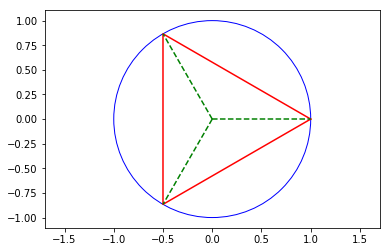

In [12]:
draw_circle_and_polygon(3)

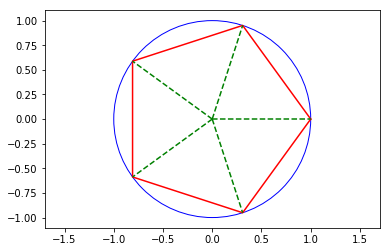

In [13]:
draw_circle_and_polygon(5)

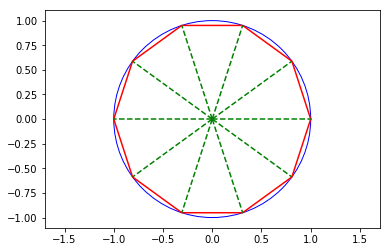

In [14]:
draw_circle_and_polygon(10)

The area of the unit circle is pi, we can use the polygon to appoximate the area of the circle.

Have you notice the gree dash line we added in these plots? We can compute the area of the polygon by add up all the triangle.

For one sigle triangle, notice it is isosceles triangle, with lateral of 1 and the top corner can be easily calculated, so we can ge the area by:

$$ Trangle_{area} = \frac{1}{2} \sin(\frac{2\pi}{N} )  $$

where __N__ is the number of lateral. 

Hence the area of polygon:

$$ Polygon_{area} = \frac{N}{2} \sin(\frac{2\pi}{N} )  $$

Let's see how this play out.

In [20]:
def compute_pi(n):
    return n/2 * np.sin(2*np.pi/n)

def error(n):
    return np.pi - compute_pi(n)

In [34]:
compute_pi(20)

3.0901699437494741

We can see that, when n is 20, it is close. If plot the error, we can see it drop quickly.

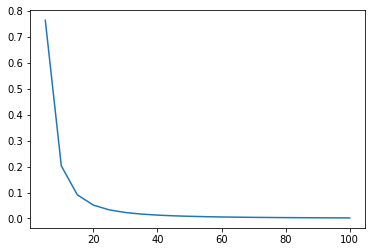

In [35]:
n = np.arange(5, 105, 5)
e = error(n)
plt.plot(n, e)

Awesome, we compute pi using polygon approximation!

## Gregory-Leibniz Series

It feels good we get a pi using polygon approximation, but if we look closely, we are using pi when we compute pi! Can we do any better?

Actually, we can use [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series) and a [sepcial expansion](https://www.math.hmc.edu/funfacts/ffiles/30001.1-3.shtml) of taylor series to get pi.

$$ \frac{\pi}{4} = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} ... $$

Let's see how that work out!

In [6]:
def compute_pi_gls(n):
    sum = 0
    for i in range(0, n):
        sum += np.power(-1, i) / (2*i + 1)
    return 4*sum

def plot_absolute_error():
    r = np.arange(5, 200, 10)
    pi_approximate = []
    for i in r:
        pi_approximate.append(abs(compute_pi_gls(i) - np.pi))
    plt.plot(r, pi_approximate)

In [56]:
compute_pi_gls(2000)

3.1410926536210413

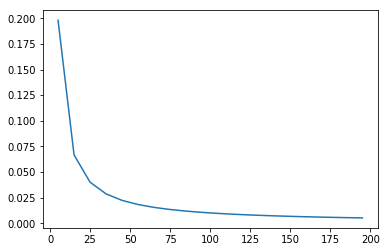

In [54]:
plot_absolute_error()

Notice after the quick dive in the first part, the convergence is not good. When n upto 2000, we only get three digits after the decimal point. We can do better right?

## Nilakantha Series

Inded, we can get result faster using [Nilakantha Series](https://en.wikipedia.org/wiki/Nilakantha_Somayaji).

$$ \pi = 3 + \frac{4}{2 \times 3 \times 4} - \frac{4}{4 \times 5 \times 6} + \frac{4}{6 \times 7 \times 8} $$

Let's see how fast can this goes.

In [1]:
def compute_pi_ns(n):
    sum = 3
    for i in range(1, n):
        sum += np.power(-1, i+1) * 4 / (2*i * (2*i + 1) * (2*i + 2))
    return sum

In [19]:
compute_pi_ns(20)

3.1416238066678384

In [21]:
compute_pi_ns(2000)

3.1415926536210472

Ha, looks like much faster, let make a comparision.

In [15]:
def compare_gls_ns(start, end):
    r = np.arange(start, end, 10)
    pi_appr1 = []
    pi_appr2 = []
    for i in r:
        pi_appr1.append(abs(compute_pi_gls(i) - np.pi))
        pi_appr2.append(abs(compute_pi_ns(i) - np.pi))
    plt.plot(r, pi_appr1, 'g', r, pi_appr2, 'r')
    plt.legend(["Gregory-Leibniz Series", "Nilakantha Series"])

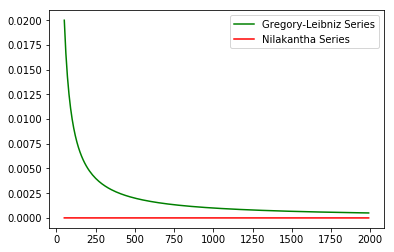

In [16]:
compare_gls_ns(50, 2000)

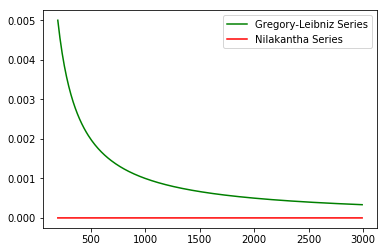

In [18]:
compare_gls_ns(200, 3000)

Really, so much faster. When n = 2000, it can reach 8 digits after decimal point!